In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [27]:
# Cargar el dataset
ruta = ruta = 'C:\\Users\\USUARIO\\Desktop\\UNIVERSIDAD\\5 semestre\\ANALSIS DE DATOS\\Anexo 2 - Dataset Vehicle\\car data.csv'

heart_df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(heart_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(heart_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(heart_df.describe())

Primeras filas del dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Pric

In [31]:
def eliminar_valores_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar el dataframe para eliminar valores atípicos
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df_filtrado

# Ejemplo: eliminar valores atípicos de la columna 'Present_Price'
heart_df_limpio = eliminar_valores_atipicos(heart_df, 'Present_Price')

# Mostrar el número de filas antes y después de la eliminación de valores atípicos
print("\nNúmero de filas antes de la eliminación de valores atípicos:", heart_df.shape[0])
print("Número de filas después de la eliminación de valores atípicos:", heart_df_limpio.shape[0])


Número de filas antes de la eliminación de valores atípicos: 301
Número de filas después de la eliminación de valores atípicos: 287


In [37]:
print(heart_df_limpio.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [65]:
# Seleccionar características y variable objetivo
# Usaremos todas las columnas excepto 'condition' como características
X = heart_df_limpio.drop(['Car_Name', 'Selling_Price'], axis=1)
y = heart_df_limpio['Selling_Price']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 1.8872088059603156
Coeficiente de determinación (R²): 0.8533833006420211


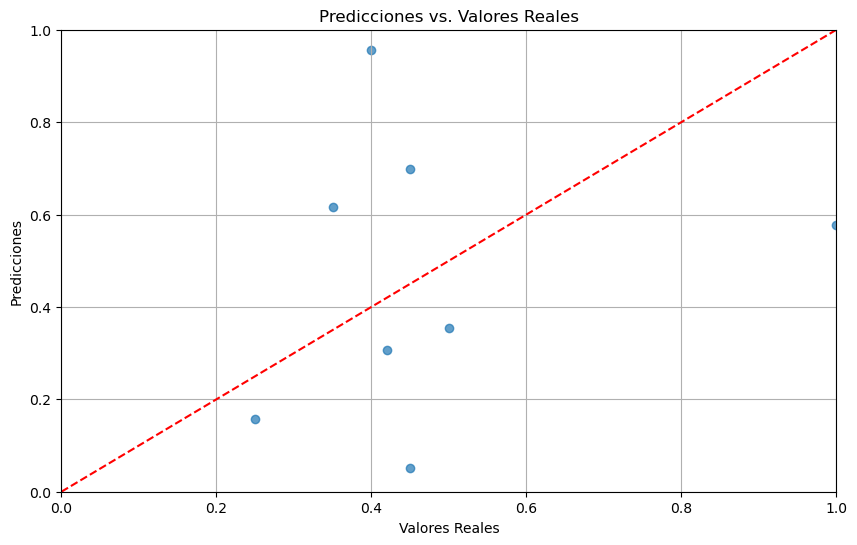

In [67]:
import matplotlib.pyplot as plt

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)
# Convertir `y` en clases discretas (ejemplo: clasificar en rangos de precios)
y_train_discreto = pd.cut(y_train, bins=3, labels=[0, 1, 2])  # Divide en 3 rangos, por ejemplo

# Entrenar el modelo de clasificación
modelo_log_reg.fit(X_train, y_train_discreto)


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo
modelo_log_reg = LogisticRegression(max_iter=1000)
modelo_log_reg.fit(X_train_scaled, y_train_discreto)
modelo_log_reg = LogisticRegression(solver='saga', max_iter=1000)
modelo_log_reg.fit(X_train_scaled, y_train_discreto)


LogisticRegression(max_iter=1000, solver='saga')

In [85]:
import pandas as pd

# Convertir `y` en categorías discretas usando rangos (ajusta los límites según tu dataset)
y_train_discreto = pd.cut(y_train, bins=3, labels=["Bajo", "Medio", "Alto"])
y_test_discreto = pd.cut(y_test, bins=3, labels=["Bajo", "Medio", "Alto"])
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=1000)
modelo_log_reg.fit(X_train_scaled, y_train_discreto)
# Realizar predicciones
y_pred_log = modelo_log_reg.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test_discreto, y_pred_log))
print("Classification Report:\n", classification_report(y_test_discreto, y_pred_log))


Accuracy: 0.6896551724137931
Classification Report:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         6
        Bajo       0.73      1.00      0.84        32
       Medio       0.57      0.40      0.47        20

    accuracy                           0.69        58
   macro avg       0.43      0.47      0.44        58
weighted avg       0.60      0.69      0.63        58



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
import pandas as pd

# Convertir `y_train` y `y_test` en categorías discretas (Bajo, Medio, Alto) para clasificación
y_train_discreto = pd.cut(y_train, bins=3, labels=["Bajo", "Medio", "Alto"])
y_test_discreto = pd.cut(y_test, bins=3, labels=["Bajo", "Medio", "Alto"])
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)  # Aumentar max_iter si es necesario
modelo_log_reg.fit(X_train_scaled, y_train_discreto)
# Realizar predicciones
y_pred_log = modelo_log_reg.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test_discreto, y_pred_log))
print("Classification Report:\n", classification_report(y_test_discreto, y_pred_log))


Accuracy: 0.6896551724137931
Classification Report:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         6
        Bajo       0.73      1.00      0.84        32
       Medio       0.57      0.40      0.47        20

    accuracy                           0.69        58
   macro avg       0.43      0.47      0.44        58
weighted avg       0.60      0.69      0.63        58



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


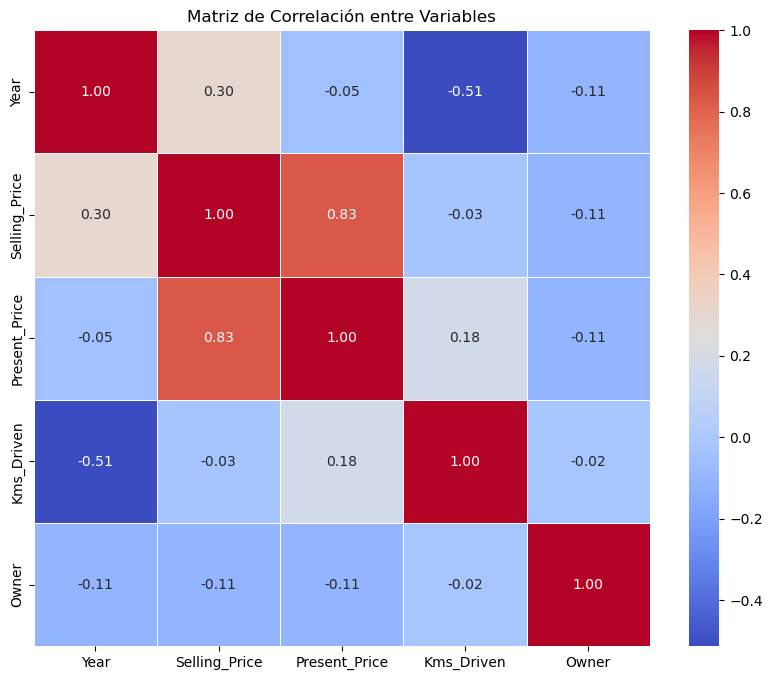

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes heart_df_limpio definido

# Filtrar solo las columnas numéricas
numerical_cols = heart_df_limpio.select_dtypes(include=['float64', 'int64']).columns
correlacion = heart_df_limpio[numerical_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", square=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()


In [103]:
from sklearn.model_selection import train_test_split

# Suponiendo que tienes un DataFrame `heart_df_limpio`
# y que ya has definido tus características X y tu variable objetivo y

# Seleccionar características y variable objetivo
X = heart_df_limpio.drop('Selling_Price', axis=1)  # Asegúrate de usar la variable que quieres predecir
y = heart_df_limpio['Selling_Price']  # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


Tamaño del conjunto de entrenamiento: 229 muestras
Tamaño del conjunto de prueba: 58 muestras


In [119]:
print(X_test.columns)

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Definir las características seleccionadas
features_selected = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 
                     'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 
                     'Seller_Type_Individual', 'Transmission_Manual']

# Escalar el conjunto de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features_selected])
X_test_scaled = scaler.transform(X_test[features_selected])

# Crear y ajustar el modelo de regresión lineal
modelo_lin_reg = LinearRegression()
modelo_lin_reg.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = modelo_lin_reg.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("R^2 Score:", r2)


Error cuadrático medio (MSE): 1.8872088059604282
R^2 Score: 0.8533833006420124


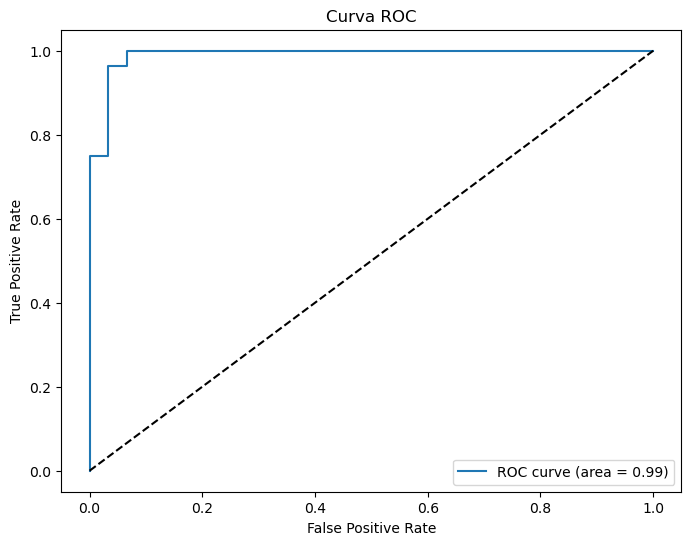


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.93      0.96      0.95        28

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear una variable binaria para el precio de venta, por ejemplo, usando un umbral
# Esto convierte 'Selling_Price' en 1 si es mayor que el promedio, 0 si no
threshold = y_train.mean()
y_train_binario = (y_train > threshold).astype(int)
y_test_binario = (y_test > threshold).astype(int)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features_selected])
X_test_scaled = scaler.transform(X_test[features_selected])

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)
modelo_log_reg.fit(X_train_scaled, y_train_binario)

# Predecir probabilidades para el conjunto de prueba
y_prob = modelo_log_reg.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_binario, y_prob)
roc_auc = roc_auc_score(y_test_binario, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Evaluación del modelo
print("\nReporte de clasificación:")
print(classification_report(y_test_binario, modelo_log_reg.predict(X_test_scaled)))


In [133]:
from sklearn.model_selection import train_test_split

# Supón que 'X' contiene todas las características y 'y' es la variable objetivo
# Ajusta el tamaño de prueba según tus necesidades (por ejemplo, 0.2 para un 20% de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Pseudo R² de McFadden: 0.9906
Precisión del modelo: 0.8448


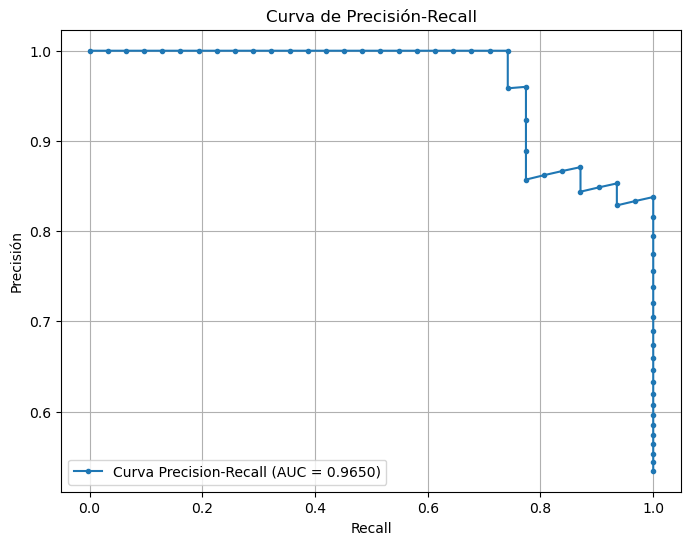

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supón que 'heart_df_limpio' es tu DataFrame preprocesado
# Definir las características (X) y la variable objetivo (y)
X = heart_df_limpio[['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 
                     'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']]
y = (heart_df_limpio['Selling_Price'] > threshold).astype(int)  # Reemplaza 'threshold' según tu criterio de binarización

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)  # El intercepto ya se incluye en sklearn
modelo_log_reg.fit(X_train_scaled, y_train)

# Calcular el pseudo R² de McFadden
log_likelihood_full = -log_loss(y_train, modelo_log_reg.predict_proba(X_train_scaled), normalize=False)
log_likelihood_null = -log_loss(y_train, np.full_like(y_train, y_train.mean()), normalize=False)
pseudo_R2 = 1 - (log_likelihood_full / log_likelihood_null)
print(f"Pseudo R² de McFadden: {pseudo_R2:.4f}")

# Calcular la precisión del modelo en el conjunto de prueba
y_pred = modelo_log_reg.predict(X_test_scaled)
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.4f}")

# Calcular y graficar la curva de precisión-recall
y_scores = modelo_log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker='.', label=f'Curva Precision-Recall (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.legend()
plt.grid()
plt.show()


In [26]:
import pandas as pd

# Reemplaza 'ruta/del/archivo.csv' con la ruta de tu archivo
car_data = pd.read_csv('C:\\Users\\USUARIO\\Desktop\\UNIVERSIDAD\\5 semestre\\ANALSIS DE DATOS\\Anexo 2 - Dataset Vehicle\\car_details_v4.csv')

# Verifica que se haya cargado correctamente
print(car_data.head())


            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

In [34]:
# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
print(car_data.columns.tolist())  # Convertir a lista para una mejor visualización

Nombres de las columnas:
['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Owner', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Fuel Type_CNG + CNG', 'Fuel Type_Diesel', 'Fuel Type_Hybrid', 'Fuel Type_LPG', 'Fuel Type_Petrol', 'Fuel Type_Petrol + CNG', 'Transmission_Manual', 'Location_Ahmedabad', 'Location_Allahabad', 'Location_Ambala Cantt', 'Location_Amritsar', 'Location_Aurangabad', 'Location_Bangalore', 'Location_Bhopal', 'Location_Bhubaneswar', 'Location_Bulandshahar', 'Location_Chandigarh', 'Location_Chennai', 'Location_Coimbatore', 'Location_Dak. Kannada', 'Location_Dehradun', 'Location_Delhi', 'Location_Deoghar', 'Location_Dharwad', 'Location_Ernakulam', 'Location_Faizabad', 'Location_Faridabad', 'Location_Ghaziabad', 'Location_Goa', 'Location_Gorakhpur', 'Location_Gurgaon', 'Location_Guwahati', 'Location_Haldwani', 'Location_Hyderabad', 'Location_Indore', 'Location_Jaipur', 'Location_Jalandhar', 'Loca

In [40]:
# Ver los primeros registros y los tipos de datos
print(car_data.head())
print(car_data.dtypes)


            Make                            Model      Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000.0  2017    87150.0   
1  Maruti Suzuki                  Swift DZire VDI   450000.0  2014    75000.0   
2        Hyundai             i10 Magna 1.2 Kappa2   220000.0  2011    67000.0   
3         Toyota                         Glanza G   799000.0  2019    37500.0   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000.0  2018    69000.0   

  Owner   Engine           Max Power              Max Torque Drivetrain  ...  \
0     0  1198 cc   87 bhp @ 6000 rpm       109 Nm @ 4500 rpm        FWD  ...   
1     1  1248 cc   74 bhp @ 4000 rpm       190 Nm @ 2000 rpm        FWD  ...   
2     0  1197 cc   79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm        FWD  ...   
3     0  1197 cc   82 bhp @ 6000 rpm       113 Nm @ 4200 rpm        FWD  ...   
4     0  2393 cc  148 bhp @ 3400 rpm       343 Nm @ 1400 rpm        RWD  ...   

   Color_Maroon  Color_Orange  C

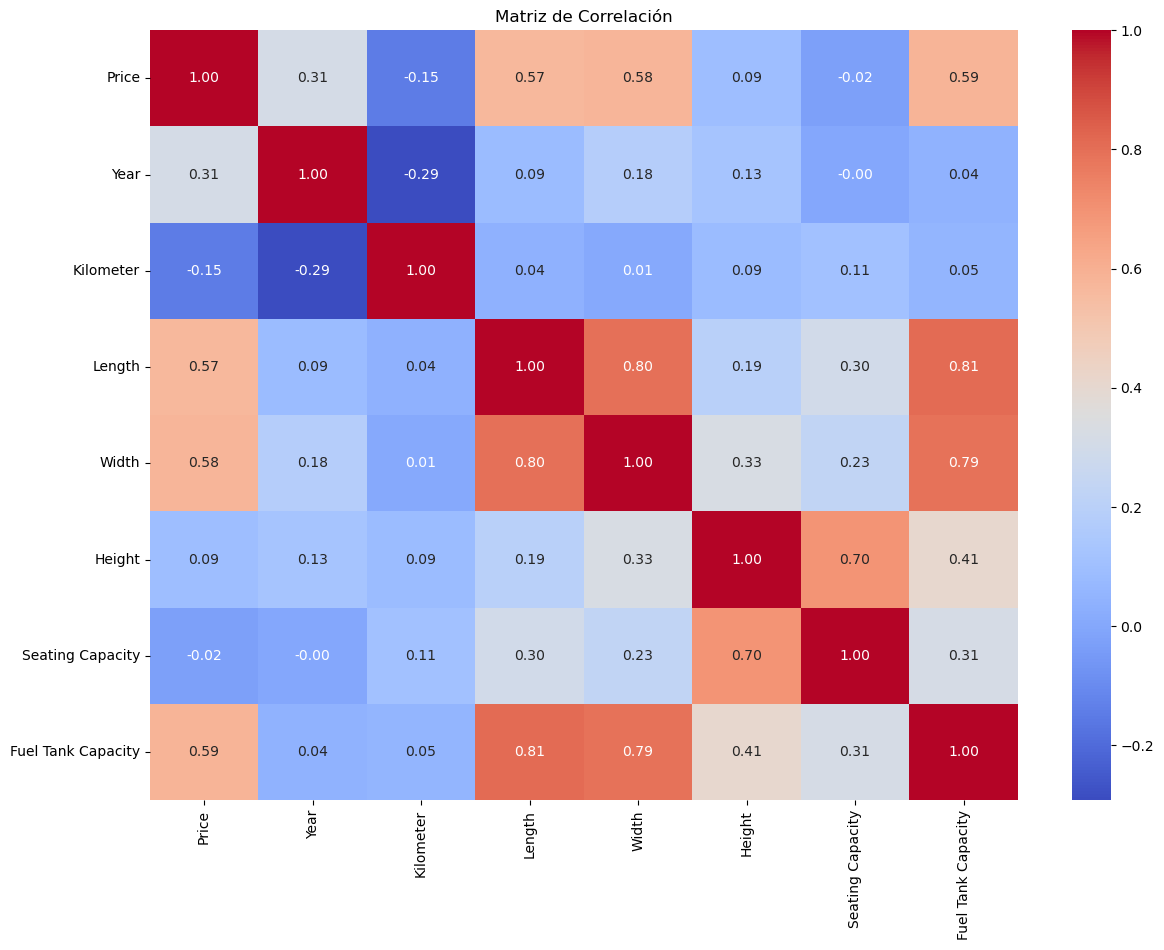

In [42]:
# Seleccionar solo las columnas numéricas
numeric_cols = car_data.select_dtypes(include=['number']).columns
correlation_matrix = car_data[numeric_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [48]:
# Limpiar nombres de columnas para quitar espacios en blanco
car_data.columns = car_data.columns.str.strip()


In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [56]:
# Definir variables independientes (X) y dependientes (y)
X = car_data.drop(columns=['Price'])
y = car_data['Price']


In [58]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
print(car_data.dtypes)


Make                       object
Model                      object
Price                     float64
Year                        int32
Kilometer                 float64
                           ...   
Color_Silver                 bool
Color_White                  bool
Color_Yellow                 bool
Seller Type_Corporate        bool
Seller Type_Individual       bool
Length: 113, dtype: object


In [66]:
# Definir X y y
X = car_data.drop(columns=['Price'])  # Eliminar la columna de precio de las independientes
y = car_data['Price']  # La variable objetivo es Price


In [68]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Asegúrate de que car_data ya está cargado

# Convertir las columnas categóricas a variables dummies
car_data_dummies = pd.get_dummies(car_data, drop_first=True)

# Definir las variables independientes (X) y dependientes (y)
X = car_data_dummies.drop(columns=['Price'])  # Eliminar la columna de precio
y = car_data_dummies['Price']  # La variable objetivo es Price

# Verificar tipos de columnas en X
print(X.dtypes)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Year                                 int32
Kilometer                          float64
Length                             float64
Width                              float64
Height                             float64
                                    ...   
Max Torque_99.08 Nm @ 4500 rpm        bool
Max Torque_99.081 Nm @ 4500 rpm       bool
Max Torque_99@2800                    bool
Drivetrain_FWD                        bool
Drivetrain_RWD                        bool
Length: 1769, dtype: object
Mean Squared Error: 1752567738672398978777088.00
R² Score: -149707771181.90


In [76]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Supongamos que ya has cargado tus datos en car_data

# Convertir Price en una variable categórica (ejemplo)
car_data['Price_Category'] = (car_data['Price'] > 200000).astype(int)  # 1 para alta, 0 para baja

# Verifica que Price_Category se haya creado
print(car_data[['Price', 'Price_Category']].head())  # Muestra las primeras filas para verificar

# Eliminar la columna de precio y la nueva variable
X = car_data.drop(columns=['Price', 'Price_Category'])

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Definir la variable objetivo
y = car_data['Price_Category']  # La variable objetivo es Price_Category

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")


       Price  Price_Category
0   505000.0               1
1   450000.0               1
2   220000.0               1
3   799000.0               1
4  1950000.0               1
Confusion Matrix:
[[  1   7]
 [  0 367]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.98      1.00      0.99       367

    accuracy                           0.98       375
   macro avg       0.99      0.56      0.61       375
weighted avg       0.98      0.98      0.97       375

Accuracy: 0.98


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Supongamos que car_data ya está cargado y procesado

# Convertir Price en una variable categórica
car_data['Price_Category'] = (car_data['Price'] > 200000).astype(int)  # 1 para alta, 0 para baja

# Eliminar la columna de precio y la nueva variable
X = car_data.drop(columns=['Price', 'Price_Category'])

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Definir la variable objetivo
y = car_data['Price_Category']  # La variable objetivo es Price_Category

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar resultados
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[  1   7]
 [  0 367]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.98      1.00      0.99       367

    accuracy                           0.98       375
   macro avg       0.99      0.56      0.61       375
weighted avg       0.98      0.98      0.97       375

Accuracy: 0.98


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que car_data ya está cargado y procesado

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(car_data.drop(columns=['Price']), drop_first=True)

# Definir la variable objetivo
y = car_data['Price']  # La variable objetivo es Price

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 36052704593779644956672.00
R-squared: -3079692686.91


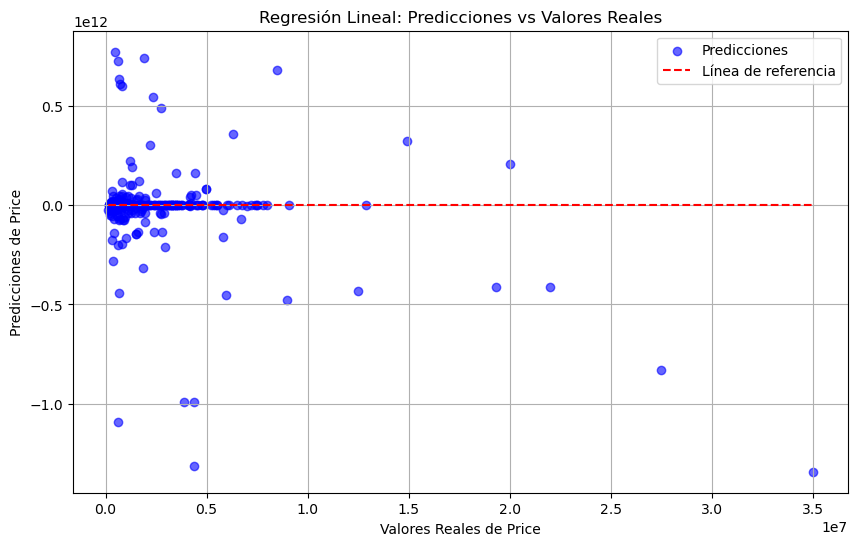

In [88]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de referencia')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales de Price')
plt.ylabel('Predicciones de Price')
plt.legend()
plt.grid()
plt.show()
